# Project 1.2: Investigate a Dataset
## European Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this Project, we will be analyzing data associated with European Soccer.
The chosen dataset contains data from soccer matches, players, and teams from several European countries from 2008 to 2016.

In particular, we'll be interested in finding trends among the successful/champions teams and how they differ from the middle and unsuccessful teams.

To start our project, let's first import the libraries:

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
from IPython.display import display
from IPython.display import Image
from IPython.core.display import Image
pd.set_option('display.max_columns', 500)

<a id='wrangling'></a>
## Data Wrangling

### Pre Analysis and Filtering
All the data of this dataset were clustered in an SQLite file.

Follows below the ERD of these tables:

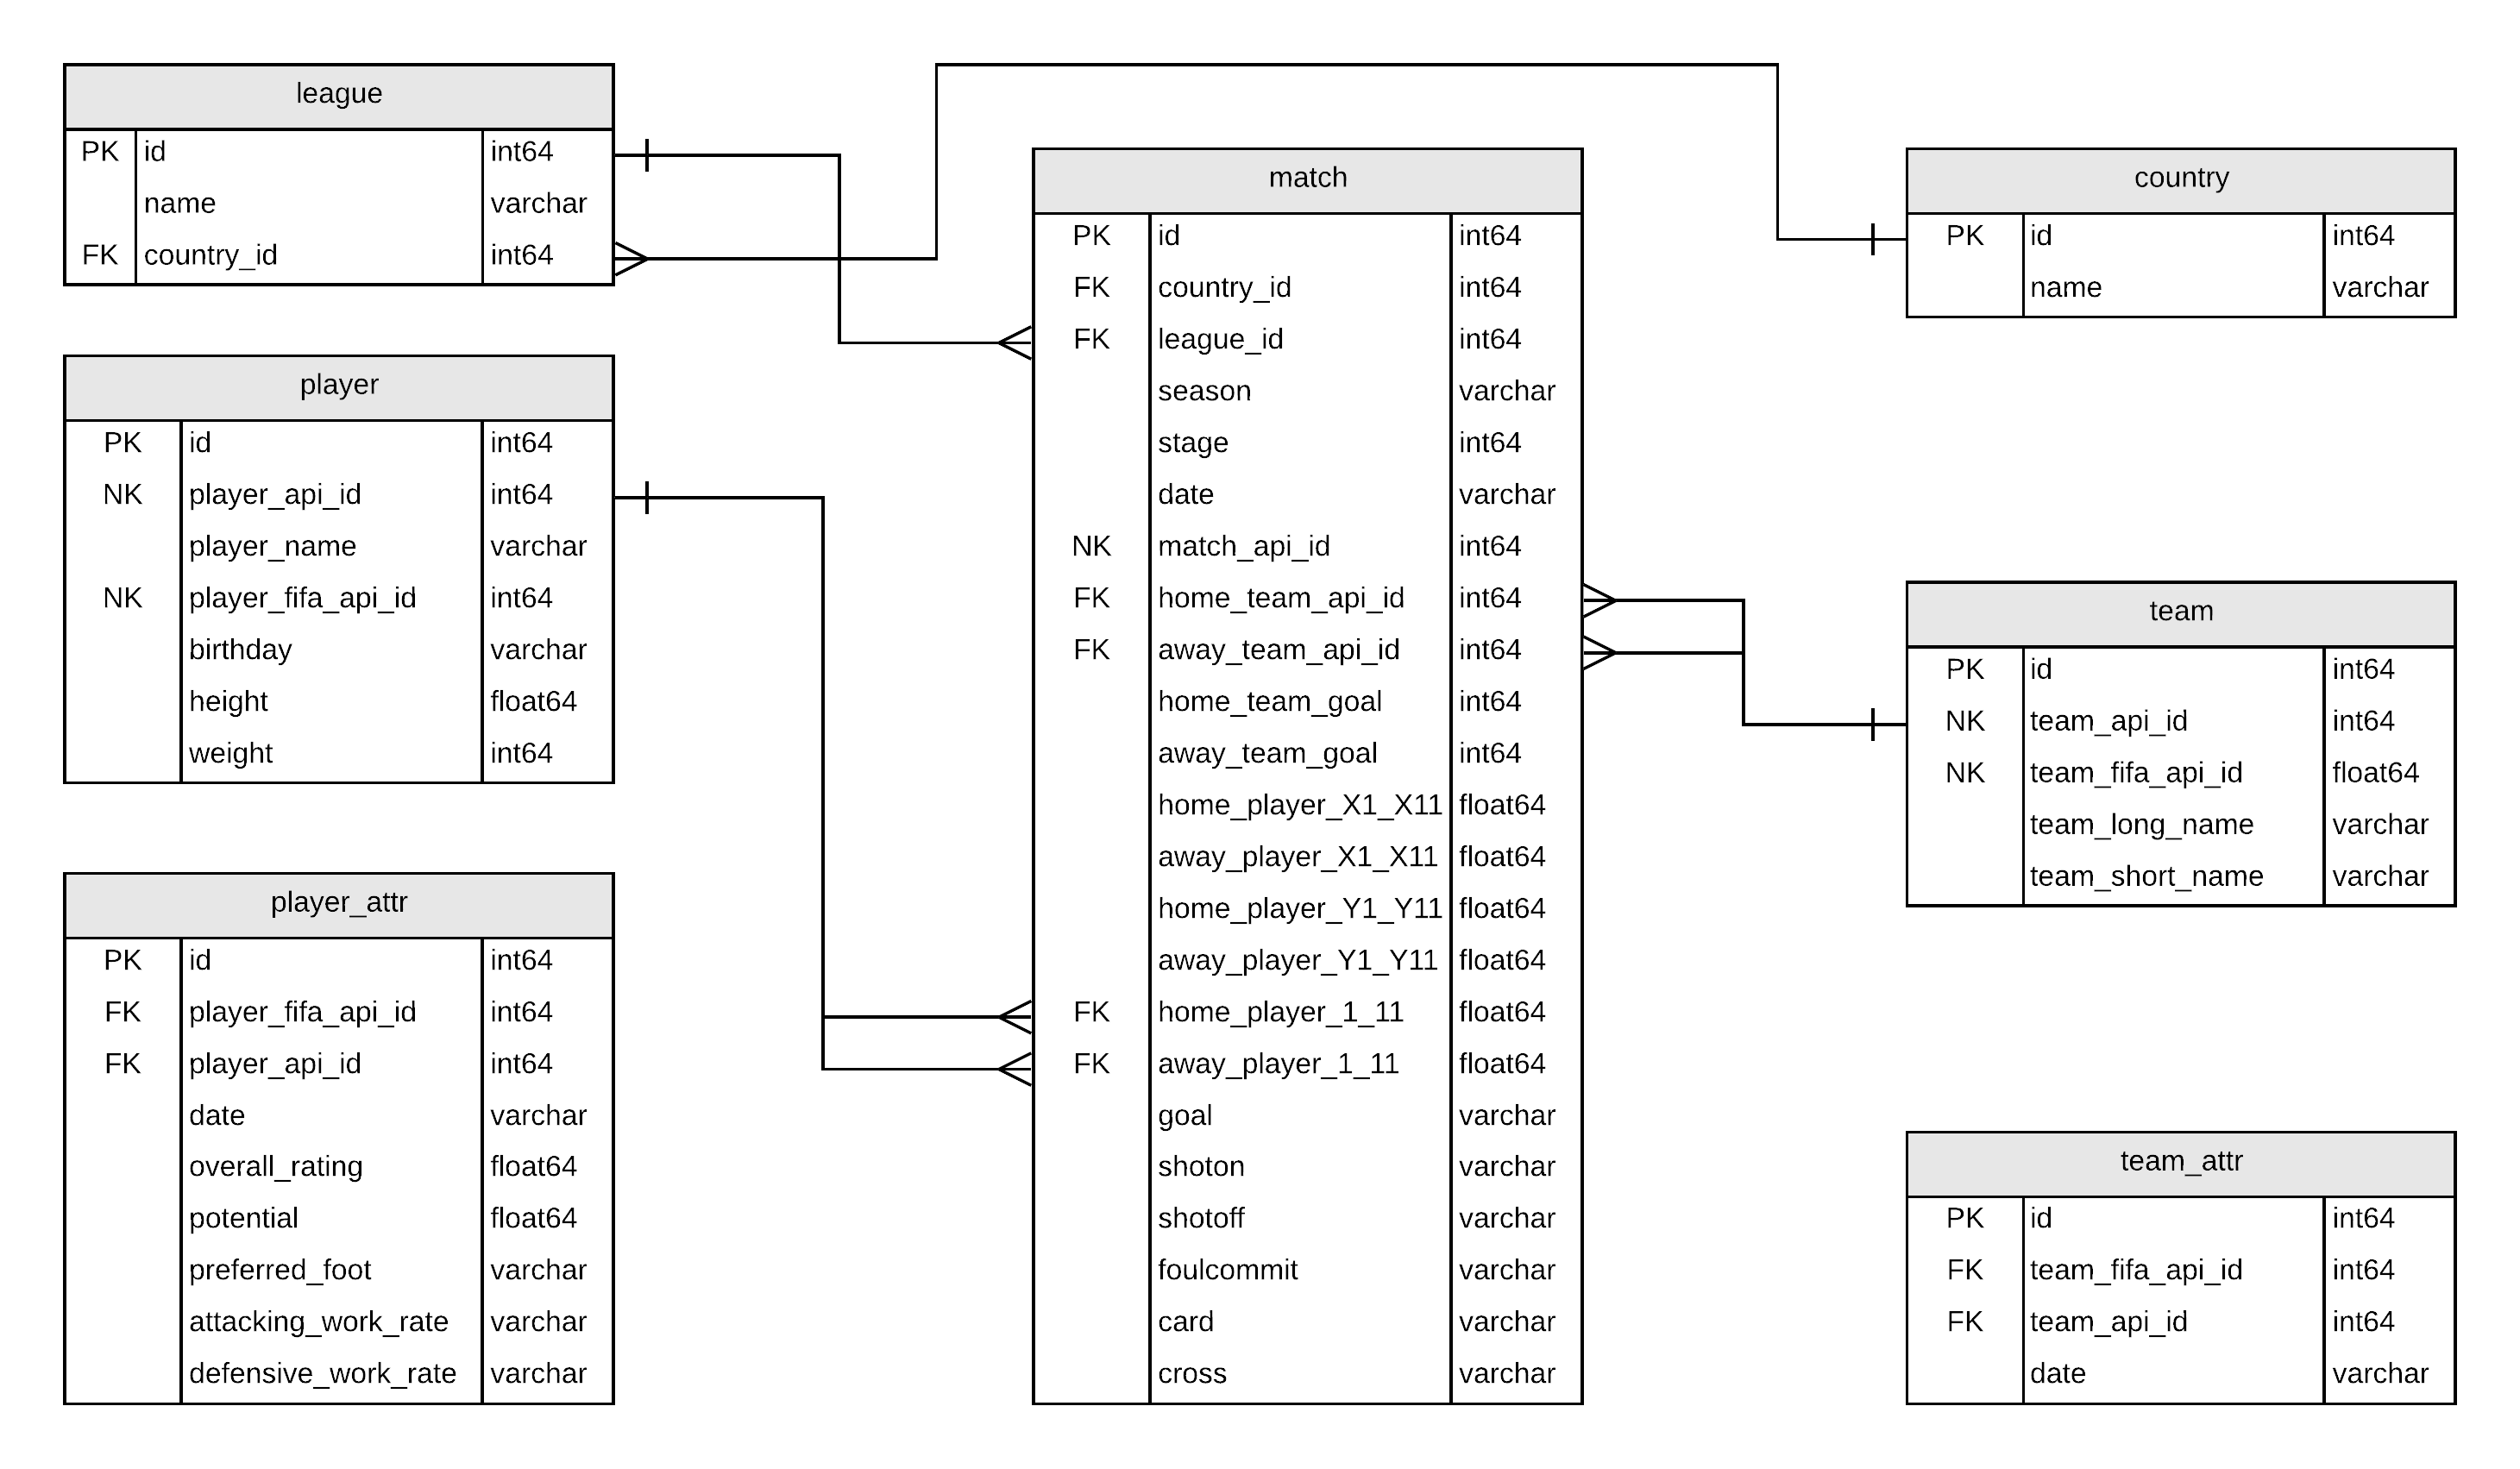

In [2]:
Image(filename=('source/Project02-ERD.png'))

After analyzing these datasets, we were able to accomplish the following initial remarks and took the first strategy decisions:


- 'Match' table has some fields that don't add much value in this project and were discarded:

    B365H, B365D, B365A, BWH, BWD, BWA, IWH, IWD, IWA, LBH, LBD, LBA, PSH, PSD, PSA, WHH, WHD, WHA, SJH, SJD, SJA, VCH, VCD, VCA, GBH, GBD, GBA, BSH, BSD, BSA


- 'Match' table has other fields that could add value to this project, but for the sake of focus on the main questions and still achieving great results, we will also discard them:

    goal, shoton, shotoff, foulcommit, card, cross, corner, possession

The remaining tables weren't changed and we will continue with our pre-analysis and filtering topic.

In order to pre-filter only the data that we will be working, I used the following query at the match table:

>SELECT  m.country_id country_id,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.season season,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.stage stage, <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.date date,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.match_api_id match_api_id,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_team_api_id,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_team_api_id,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_team_goal,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_team_goal,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_1,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_2,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_3,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_4,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_5,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_6,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_7,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_8,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_9,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_10,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.home_player_11,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_1,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_2,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_3,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_4,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_5,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_6,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_7,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_8,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_9,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_10,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;m.away_player_11<br>
FROM Match m<br>
ORDER BY date;

### General Properties

As could be saw on the ERD, to work with only one Dataset we need to merge all of them, but first we will load each one:

In [3]:
# LOAD datasets

match_raw = pd.read_csv('source/match_rev01.csv')
match = match_raw.copy()
country_raw = pd.read_csv('source/country.csv')
country = country_raw.copy()
league_raw = pd.read_csv('source/league.csv')
league = league_raw.copy()
player_raw = pd.read_csv('source/player.csv')
player = player_raw.copy()
player_att_raw = pd.read_csv('source/player_attributes.csv')
player_att = player_att_raw.copy()
team_raw = pd.read_csv('source/team.csv')
team = team_raw.copy()
team_att_raw = pd.read_csv('source/team_attributes.csv')
team_att = team_att_raw.copy()

The match will be the main table, that will aggregate all of the other tables.

Let's see how it looks:

In [4]:
match.head()

,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,24558,2008/2009,1,2008-07-18 00:00:00,486263,10192,9931,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24558,2008/2009,1,2008-07-19 00:00:00,486264,9930,10179,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24558,2008/2009,1,2008-07-20 00:00:00,486265,10199,9824,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24558,2008/2009,1,2008-07-20 00:00:00,486266,7955,10243,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24558,2008/2009,2,2008-07-23 00:00:00,486267,9931,9956,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Results field

In order to facilitate the following analysis, we will create a new field called "result", which will indicates if a home/away team won, lost or draw a game

In [5]:
# Creating empty list to aggregate the values of iteration
result_list_home = []
result_list_away = []
points_list_home = []
points_list_away = []

# Iteration into match df
for index,row in match.iterrows():
    
    # Assemblying the iteration value with a variable
    home_team_goal = row['home_team_goal']
    away_team_goal = row['away_team_goal']
    home_team_api_id = row['home_team_api_id']
    away_team_api_id = row['away_team_api_id']
    match_api_id = row['match_api_id']
    
    # Contitional sentence
    if home_team_goal > away_team_goal:
        
        # Variable score_home receive 'won' string and score_away receive 'lost' string
        score_home = 'won'
        score_away = 'lost'
        
        # Variable points_home receive 3 points string and points_away receive 0 points
        points_home = 3
        points_away = 0
        
        # Appeding to the list
        result_list_home.append(score_home)
        result_list_away.append(score_away)
        
        # Appeding to the list
        points_list_home.append(points_home)
        points_list_away.append(points_away)
        
    elif home_team_goal < away_team_goal:
        
        # Variable score_home receive 'lost' string and score_away receive 'won' string
        score_home = 'lost'
        score_away = 'won'
        
        # Variable points_home receive 3 points string and points_away receive 0 points
        points_home = 0
        points_away = 3
        
        # Appeding to the list
        result_list_home.append(score_home)
        result_list_away.append(score_away)
        
        # Appeding to the list
        points_list_home.append(points_home)
        points_list_away.append(points_away)        
        
    else:
        
        # Variable score_home receive 'draw' string and score_away receive 'draw' string
        score_home = 'draw'
        score_away = 'draw'
        
        # Variable points_home receive 3 points string and points_away receive 0 points
        points_home = 1
        points_away = 1
        
        # Appeding to the list
        result_list_home.append(score_home)
        result_list_away.append(score_away)
        
        # Appeding to the list
        points_list_home.append(points_home)
        points_list_away.append(points_away)            

# Appending score list values to the match df new columns
match['home_team_result'] = result_list_home
match['away_team_result'] = result_list_away

# Appending score list values to the match df new columns
match['home_team_points'] = points_list_home
match['away_team_points'] = points_list_away

# Getting all the column names of the match df and transforming it into a list
cols_match = match.columns.tolist()

# Creating new list cols_match with main columns, home_team_result and away_team_result
cols_match = cols_match[0:9]+cols_match[-4:]+cols_match[9:-4]
match_1 = match.loc[:,cols_match]

In [6]:
match_1.head()

,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_result,away_team_result,home_team_points,away_team_points,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,24558,2008/2009,1,2008-07-18 00:00:00,486263,10192,9931,1,2,lost,won,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24558,2008/2009,1,2008-07-19 00:00:00,486264,9930,10179,3,1,won,lost,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24558,2008/2009,1,2008-07-20 00:00:00,486265,10199,9824,1,2,lost,won,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24558,2008/2009,1,2008-07-20 00:00:00,486266,7955,10243,1,2,lost,won,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24558,2008/2009,2,2008-07-23 00:00:00,486267,9931,9956,1,0,won,lost,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Table Format

The format of this table could be more optimized, whether to better receive the other tables or to facilitate/optimizes the analysis of data.

In order to obtain a consolidate match table with an improved table format, we will first divide it into 4 other tables (please see table below):
- TABLE A
- TABLE B
- TABLE C
- TABLE D
- TABLE E

Each table has the main columns and the respective table column.

The next step is utilizing melt function to reshape these tables and finalize merging all these 3 tables into a 'consolidated match table'. For the sake of reliability of the merge, we will also create a team flag to assist this step, which indicates wheter we're refering to the home team or away team.

We will melt it with the following steps/order:

<ol>
    <li>TABLE A: home_team_api_id / away_team_api_id --> match_api / match_api_id</li>
    <li>TABLE B: home_team_goal / away_team_goal --> team_goal / goals</li>
    <li>TABLE C: home_team_result / away_team_result --> team_result / result</li>
    <li>TABLE D: home_team_points / away_team_points --> team_points / points</li>
    <li>TABLE E: home_player_1..11 / away_player_1..11     -->     player_desc / player_api_id</li>
</ol>



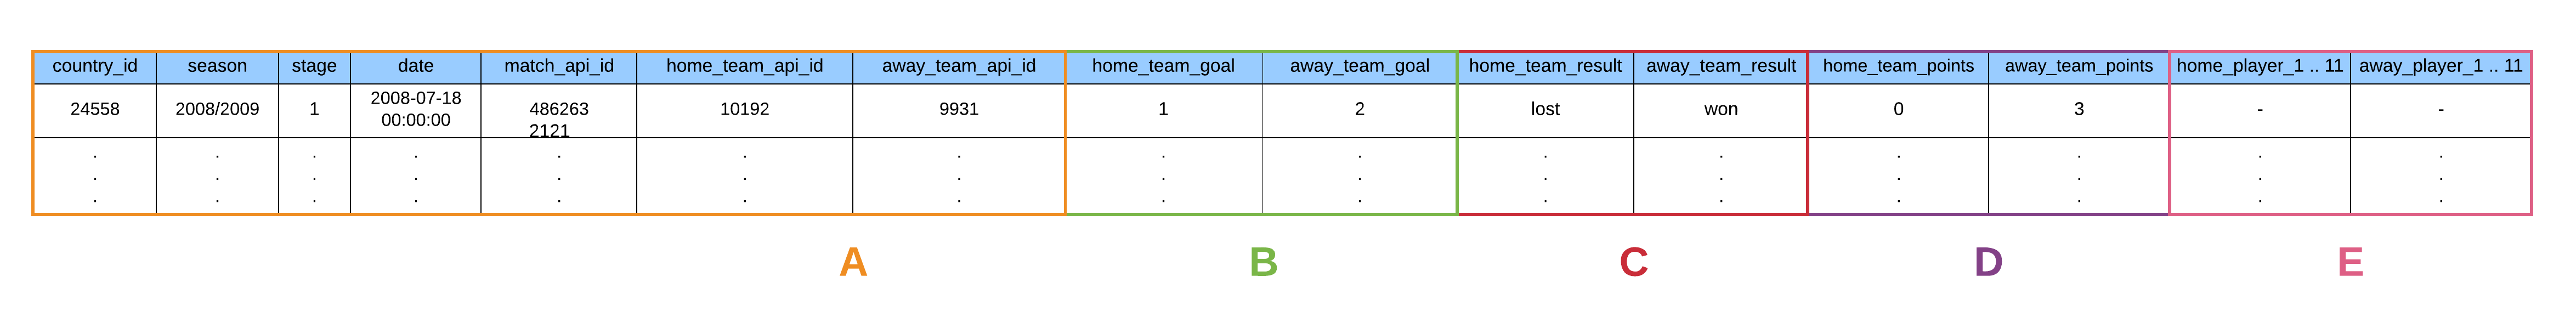

In [7]:
Image(filename=('source/melt_table.png'))

In [8]:
# 1. TABLE A: home_team_api_id / away_team_api_id --> match_api / match_api_id

## Getting all the column names of the match df and transforming it into the main list
## (columns that will not be reshaped)
cols = match.columns.tolist()
cols_main = cols[0:5]

## Creating new table A with main columns, home_team_api_id and away_team_api_id
match_a_1 = match.loc[:,'country_id':'away_team_api_id']

## Reshaping chosen fields of match df to TABLE A with melt function
match_a_2 = pd.melt(match_a_1, id_vars=cols_main, var_name='team_api', value_name='team_api_id')

## Creating team_flag in order to assist in the forthcoming merging process

### Indexing flags
row_indexes_home_a = match_a_2[match_a_2['team_api']=='home_team_api_id'].index
row_indexes_away_a = match_a_2[match_a_2['team_api']=='away_team_api_id'].index

### Assigning flags and reordering df
match_a_2.loc[row_indexes_home_a,'team_flag']="home_team"
match_a_2.loc[row_indexes_away_a,'team_flag']="away_team"


## -------------------------------------------------------------------------------------------- ##


# 2. TABLE B: home_team_goal / away_team_goal --> team_goal / goals

## Creating new table B with main columns, home_team_goal and away_team_goal
match_b_1 = match.loc[:,['country_id','season','stage','date','match_api_id','home_team_goal','away_team_goal']]

## Reshaping chosen fields of match df to TABLE B with melt function
match_b_2 = pd.melt(match_b_1, id_vars=cols_main, var_name='team_goal', value_name='team_goals')

## Creating team_flag in order to assist in the forthcoming merging process

## Indexing flags
row_indexes_home_b = match_b_2[match_b_2['team_goal']=='home_team_goal'].index
row_indexes_away_b = match_b_2[match_b_2['team_goal']=='away_team_goal'].index

## Assigning flags and reordering df
match_b_2.loc[row_indexes_home_b,'team_flag']="home_team"
match_b_2.loc[row_indexes_away_b,'team_flag']="away_team"


## -------------------------------------------------------------------------------------------- ##


# 3. TABLE C: home_team_result / away_team_result --> team_result / result

## Creating new table C with main columns, home_team_result and away_team_result
match_c_1 = match.loc[:,['country_id','season','stage','date','match_api_id','home_team_result','away_team_result']]

## Reshaping chosen fields of match df to TABLE B with melt function
match_c_2 = pd.melt(match_c_1, id_vars=cols_main, var_name='team_result', value_name='result')

## Creating team_flag in order to assist in the forthcoming merging process

## Indexing flags
row_indexes_home_c = match_c_2[match_c_2['team_result']=='home_team_result'].index
row_indexes_away_c = match_c_2[match_c_2['team_result']=='away_team_result'].index

## Assigning flags and reordering df
match_c_2.loc[row_indexes_home_c,'team_flag']="home_team"
match_c_2.loc[row_indexes_away_c,'team_flag']="away_team"



## -------------------------------------------------------------------------------------------- ##


# 3. TABLE D: home_team_points / away_team_points --> team_points / points

## Creating new table D with main columns, home_team_points and away_team_points
match_d_1 = match.loc[:,['country_id','season','stage','date','match_api_id','home_team_points','away_team_points']]

## Reshaping chosen fields of match df to TABLE B with melt function
match_d_2 = pd.melt(match_d_1, id_vars=cols_main, var_name='team_points', value_name='points')

## Creating team_flag in order to assist in the forthcoming merging process

## Indexing flags
row_indexes_home_d = match_d_2[match_d_2['team_points']=='home_team_points'].index
row_indexes_away_d = match_d_2[match_d_2['team_points']=='away_team_points'].index

## Assigning flags and reordering df
match_d_2.loc[row_indexes_home_d,'team_flag']="home_team"
match_d_2.loc[row_indexes_away_d,'team_flag']="away_team"


## -------------------------------------------------------------------------------------------- ##


# 4. TABLE E: home_player_1..11 / away_player_1..11 --> player_desc / player_api_id

## Getting all the column names of the match df and transforming it into a list
cols_e = match.columns.tolist()

## Creating new table E with main columns, home_player_1 .. 1 and away_player_1 .. 11
cols_e = cols_e[0:5]+cols_e[9:-2]
match_e_1 = match.loc[:,cols_e]

## Reshaping chosen fields of match df to TABLE E with melt function
match_e_2 = pd.melt(match_e_1, id_vars=cols_main, var_name='player_desc', value_name='player_api_id')

## Creating team_flag in order to assist in the forthcoming merge process

for number in range(1,12):
    
    ## Indexing flags
    ### Indexing home team flags
    row_index_home = match_e_2[match_e_2['player_desc']=='home_player_{}'.format(number)].index
    
    ### Indexing away team flags
    row_index_away = match_e_2[match_e_2['player_desc']=='away_player_{}'.format(number)].index
    
    ## Assigning flags
    ### Assign home team flags
    match_e_2.loc[row_index_home,'team_flag']="home_team"
    
    ### Assign away team flags
    match_e_2.loc[row_index_away,'team_flag']="away_team"

### Consolidated match table

Ok, now that we have table A, B, C, D and the subsequent team flags, we will merge it into a consolidated table.

In [9]:
# Merge Table A with Table B
match_a_b = pd.merge(match_a_2, match_b_2, on = ['date','match_api_id','team_flag'], suffixes=('_x','_y'))

# Merge Table AB with Table C
match_a_b_c = pd.merge(match_a_b, match_c_2, on = ['date','match_api_id','team_flag'], suffixes=('_w','_z'))

# Merge Table ABC with Table D
match_a_b_c_d = pd.merge(match_a_b_c, match_d_2, on = ['date','match_api_id','team_flag'], suffixes=('_i','_j'))

# Merge Table ABCD with Table E
match_merged = pd.merge(match_a_b_c_d, match_e_2, on = ['date','match_api_id','team_flag'], suffixes=('_k','_l'))

match_merged.sort_values(by=["date", "match_api_id"]).head()

,country_id_x,season_x,stage_x,date,match_api_id,team_api,team_api_id,team_flag,country_id_y,season_y,stage_y,team_goal,team_goals,country_id_i,season_i,stage_i,team_result,result,country_id_j,season_j,stage_j,team_points,points,country_id,season,stage,player_desc,player_api_id
0,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,1,home_team_goal,1,24558,2008/2009,1,home_team_result,lost,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_1,NaN
1,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,1,home_team_goal,1,24558,2008/2009,1,home_team_result,lost,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_2,NaN
2,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,1,home_team_goal,1,24558,2008/2009,1,home_team_result,lost,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_3,NaN
3,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,1,home_team_goal,1,24558,2008/2009,1,home_team_result,lost,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_4,NaN
4,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team_api_id,10192,home_team,24558,2008/2009,1,home_team_goal,1,24558,2008/2009,1,home_team_result,lost,24558,2008/2009,1,home_team_points,0,24558,2008/2009,1,home_player_5,NaN


In [10]:
# The resulting table has a lot of redundant columns, we will discard them and 
# we will also reshape it to be ordained as we want

match_clean_1 = match_merged.loc[:,['country_id_x','season_x','stage_x','date','match_api_id',
                                    'team_flag','team_api_id','team_goals','result','points','player_api_id']]

match_clean_1.rename(index=str,columns={'country_id_x':'country_id','season_x':'season','stage_x':'stage'}, inplace=True)
match_clean_1.head()

,country_id,season,stage,date,match_api_id,team_flag,team_api_id,team_goals,result,points,player_api_id
0,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN
1,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN
2,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN
3,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN
4,24558,2008/2009,1,2008-07-18 00:00:00,486263,home_team,10192,1,lost,0,NaN


### Merge

Finally that we have the match table in the format we want, we will merge it into other datasets in the following order:
<ol>
    <li>Country        --> League        --> Match </li>
    <li>Team           --> Match (home & away data)</li>
    <li>Player 1 to 10 --> Match (home & away data)</li>
</ol>

In [11]:
# 1. Country --> League --> Match

## Merge Country --> League
league_merged_1 = pd.merge(league, country, left_on = 'country_id', right_on='id')
league_merged_1.loc[8,'name_x'] = 'Scotland Scottish Premiership'

## Removing redundant columns and reordering it
league_merged = league_merged_1.loc[:,['country_id','name_y','name_x']]
league_merged.rename(columns={'name_x': 'league', 'name_y': 'country'}, inplace=True)
league_merged['league'] = league_merged['league'].str.split(n=1,expand = True)[1]

## Merge League --> Match
match_clean_league_1 = pd.merge(match_clean_1, league_merged, on = 'country_id')
match_clean_league_2 = match_clean_league_1.iloc[:,[0,-2,-1,1,2,3,4,5,6,7,8,9,10]]


## -------------------------------------------------------------------------------------------- ##


# 2. Merge Team --> Match (home & away data)
match_clean_team_1 = pd.merge(match_clean_league_2, team, on = ['team_api_id'])

## Removing redundant columns and reordering it
match_clean_team_2 = match_clean_team_1.iloc[:,[0,1,2,3,4,5,6,7,8,-2,-1,9,10,11,12]]


## -------------------------------------------------------------------------------------------- ##


# 3. Merge Player 1 to 10 --> Match (home & away data)
match_clean_player_1 = pd.merge(match_clean_team_2, player, on = ['player_api_id'])

## Removing redundant columns and reordering it
match_clean_player_2 = match_clean_player_1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,-3,-2,-1]]
match_clean_player_3 = match_clean_player_2.sort_values(by=['date','match_api_id'])
match_clean_player_3.head()

,country_id,country,league,season,stage,date,match_api_id,team_flag,team_api_id,team_long_name,team_short_name,team_goals,result,points,player_api_id,player_name,birthday,height,weight
28712,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30823,Stephane Grichting,1979-03-30 00:00:00,185.42,176
41752,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30977,Dariusz Dudka,1983-12-09 00:00:00,182.88,185
53441,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,34037,Ireneusz Jelen,1981-04-09 00:00:00,182.88,163
69032,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,40714,Remy Riou,1987-08-06 00:00:00,187.96,179
69152,4769,France,Ligue 1,2008/2009,1,2008-08-09 00:00:00,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,11323,Cedric Hengbart,1980-07-13 00:00:00,182.88,161


## Data Cleaning

### Drop Rows with Missing Values - Match Clean

To finalize "Pre Analysis and Filtering" topic, we need to drop row with missing values, dedupe data and fix the data types of the dataframe:

In [12]:
# view missing value count for each feature
match_clean_player_3.isnull().sum()

country_id         0
country            0
league             0
season             0
stage              0
date               0
match_api_id       0
team_flag          0
team_api_id        0
team_long_name     0
team_short_name    0
team_goals         0
result             0
points             0
player_api_id      0
player_name        0
birthday           0
height             0
weight             0
dtype: int64

In [13]:
# drop rows with any null values in dataset
match_clean_player_3.dropna(axis=0, inplace=True)

# checks if any of columns have null values - should print False
match_clean_player_3.isnull().sum().any()

False

### Dedupe Data - Match Clean

In [14]:
# print number of duplicates in match_clean dataset
sum(match_clean_player_3.duplicated())

1

In [15]:
# drop duplicates in datasets
match_clean_player_3.drop_duplicates(inplace=True)

# print number of duplicates again to confirm dedupe - should be 0
sum(match_clean_player_3.duplicated())

0

### Datatypes - Match Clean

In [16]:
# Datatypes
match_clean_player_3.dtypes

country_id           int64
country             object
league              object
season              object
stage                int64
date                object
match_api_id         int64
team_flag           object
team_api_id          int64
team_long_name      object
team_short_name     object
team_goals           int64
result              object
points               int64
player_api_id       object
player_name         object
birthday            object
height             float64
weight               int64
dtype: object

In [17]:
# Fixing date and bithday fields type
match_clean_player_3['date'] = pd.to_datetime(match_clean_player_3['date'])
match_clean_player_3['birthday'] = pd.to_datetime(match_clean_player_3['birthday'])

# Fixing player_api_id data type
match_clean_player_3['player_api_id'] = match_clean_player_3['player_api_id'].astype(int)
match_clean_player_3['match_year'] = match_clean_player_3.date.dt.year

## Getting all the column names of the match df and transforming it into a list
cols_match_player_3 = match_clean_player_3.columns.tolist()

## Creating consolidated main table
cols_match_player_3_1 = cols_match_player_3[0:6]+cols_match_player_3[-1:]+cols_match_player_3[6:-1]
match_clean_player_4 = match_clean_player_3.loc[:,cols_match_player_3_1]

match_clean_player_4.head()

,country_id,country,league,season,stage,date,match_year,match_api_id,team_flag,team_api_id,team_long_name,team_short_name,team_goals,result,points,player_api_id,player_name,birthday,height,weight
28712,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30823,Stephane Grichting,1979-03-30,185.42,176
41752,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,30977,Dariusz Dudka,1983-12-09,182.88,185
53441,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,34037,Ireneusz Jelen,1981-04-09,182.88,163
69032,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,40714,Remy Riou,1987-08-06,187.96,179
69152,4769,France,Ligue 1,2008/2009,1,2008-08-09,2008,483129,home_team,8583,AJ Auxerre,AUX,2,won,3,11323,Cedric Hengbart,1980-07-13,182.88,161


In [18]:
# Datatypes
match_clean_player_4.dtypes

country_id                  int64
country                    object
league                     object
season                     object
stage                       int64
date               datetime64[ns]
match_year                  int64
match_api_id                int64
team_flag                  object
team_api_id                 int64
team_long_name             object
team_short_name            object
team_goals                  int64
result                     object
points                      int64
player_api_id               int64
player_name                object
birthday           datetime64[ns]
height                    float64
weight                      int64
dtype: object

### Save Data - Match Clean

In [19]:
# Attributing a shorter and easiest variable name to Exploratory Data Analysis
df = match_clean_player_4.copy()

### Remaining Dataframes


### Player Att: Drop Rows with Missing Values

Even though we will not merge it to the main df, we will prepare two last df to be as well analyzed into forthcoming steps

In [20]:
# view data lenght
len(player_att)

183978

In [21]:
# view missing value count for each feature
player_att.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [22]:
# Taking a look into the missing data
null_data = player_att[player_att.isnull().any(axis=1)]
null_data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30 00:00:00,64.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,71.0,39.0,71.0,58.0,28.0,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22 00:00:00,64.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,71.0,39.0,71.0,62.0,66.0,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30 00:00:00,66.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,74.0,39.0,71.0,62.0,66.0,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30 00:00:00,68.0,75.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,62.0,73.0,48.0,75.0,72.0,74.0,39.0,76.0,66.0,69.0,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,NaN,_0,41.0,33.0,70.0,51.0,24.0,30.0,35.0,55.0,45.0,44.0,60.0,61.0,59.0,62.0,73.0,48.0,75.0,72.0,74.0,39.0,76.0,66.0,69.0,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0


The missing values represents only 0.5% - 1.7% of the data. As we will analyze this dataframe mostly with mean values, we could drop rows with missing values and still be with relevant data.

In [23]:
# drop rows with any null values in dataset
player_att.dropna(axis=0, inplace=True)

# checks if any of columns have null values - should print False
player_att.isnull().sum().any()

False

### Player Att: Dedupe Data

In [24]:
# print number of duplicates in player_att dataset
sum(player_att.duplicated())

0

In [25]:
# drop duplicates in datasets
player_att.drop_duplicates(inplace=True)

# print number of duplicates again to confirm dedupe - should be 0
sum(player_att.duplicated())

0

### Player Att: Datatypes

In [26]:
player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [27]:
# Datatypes
print(player_att.dtypes)

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [28]:
# Fixing date field type - Player att
player_att['date'] = pd.to_datetime(player_att['date'])
player_att.loc[:,'crossing':] = player_att.loc[:,'crossing':].astype('int64')
player_att.loc[:,'overall_rating':'potential'] = player_att.loc[:,'overall_rating':'potential'].astype('int64')                     

In [29]:
# Datatypes - Player Att
player_att.dtypes

id                              int64
player_fifa_api_id              int64
player_api_id                   int64
date                   datetime64[ns]
overall_rating                  int64
potential                       int64
preferred_foot                 object
attacking_work_rate            object
defensive_work_rate            object
crossing                        int64
finishing                       int64
heading_accuracy                int64
short_passing                   int64
volleys                         int64
dribbling                       int64
curve                           int64
free_kick_accuracy              int64
long_passing                    int64
ball_control                    int64
acceleration                    int64
sprint_speed                    int64
agility                         int64
reactions                       int64
balance                         int64
shot_power                      int64
jumping                         int64
stamina     

### Player Attr: Save Data

In [30]:
# Consolidate dataframe
player_att_clean = player_att.copy()

### Team Att: Drop Rows with Missing Values

In [31]:
# view data lenght
len(team_att)

1458

In [32]:
# view missing value count for each feature
team_att.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In this case, the missing values represents 66% of the data. It makes no sense to simply drop the rows with missing values, unfortinatelly we will drop this column and miss the numeric atribute of dribbling, but we could still classificate the dribbling with the column buildUpPlayDribblingClass.

In [33]:
# drop rows with any null values in dataset
team_att.drop(columns=['buildUpPlayDribbling'], inplace=True)

# checks if any of columns have null values - should print False
team_att.isnull().sum().any()

False

### Team Att: Dedupe Data

In [34]:
# print number of duplicates in team_att dataset
sum(team_att.duplicated())

0

In [35]:
# drop duplicates in dataset
team_att.drop_duplicates(inplace=True)

# print number of duplicates again to confirm dedupe - should be 0
sum(team_att.duplicated())

0

### Team Att: Datatypes

In [36]:
team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [37]:
print(team_att.dtypes)

id                                 int64
team_fifa_api_id                   int64
team_api_id                        int64
date                              object
buildUpPlaySpeed                   int64
buildUpPlaySpeedClass             object
buildUpPlayDribblingClass         object
buildUpPlayPassing                 int64
buildUpPlayPassingClass           object
buildUpPlayPositioningClass       object
chanceCreationPassing              int64
chanceCreationPassingClass        object
chanceCreationCrossing             int64
chanceCreationCrossingClass       object
chanceCreationShooting             int64
chanceCreationShootingClass       object
chanceCreationPositioningClass    object
defencePressure                    int64
defencePressureClass              object
defenceAggression                  int64
defenceAggressionClass            object
defenceTeamWidth                   int64
defenceTeamWidthClass             object
defenceDefenderLineClass          object
dtype: object


In [38]:
# Fixing date field type - Team att
team_att['date'] = pd.to_datetime(player_att['date'])

In [39]:
# Datatypes - Team att
team_att.dtypes

id                                         int64
team_fifa_api_id                           int64
team_api_id                                int64
date                              datetime64[ns]
buildUpPlaySpeed                           int64
buildUpPlaySpeedClass                     object
buildUpPlayDribblingClass                 object
buildUpPlayPassing                         int64
buildUpPlayPassingClass                   object
buildUpPlayPositioningClass               object
chanceCreationPassing                      int64
chanceCreationPassingClass                object
chanceCreationCrossing                     int64
chanceCreationCrossingClass               object
chanceCreationShooting                     int64
chanceCreationShootingClass               object
chanceCreationPositioningClass            object
defencePressure                            int64
defencePressureClass                      object
defenceAggression                          int64
defenceAggressionCla

### Team Att: Save Data

In [40]:
# Consolidate dataframe
team_att_clean = team_att.copy()

<a id='eda'></a>
## Exploratory Data Analysis

Before we begin with the exploratory data analysis, let's do the first steps:
How many seasons there is in total?

In [41]:
df['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

How many matches was played from season 2008/2009 until 2015/2016?

In [42]:
len(df)

542280

We want to see which season has most matches, so we need to filter them:


In [43]:
df_0809 = df[df['season'] == '2008/2009']
df_0910 = df[df['season'] == '2009/2010']
df_1011 = df[df['season'] == '2010/2011']
df_1112 = df[df['season'] == '2011/2012']
df_1213 = df[df['season'] == '2012/2013']
df_1314 = df[df['season'] == '2013/2014']
df_1415 = df[df['season'] == '2014/2015']
df_1516 = df[df['season'] == '2015/2016']

In [44]:
# Selecting each league
df_1415_bel = df_1415.groupby(['league']).get_group('Jupiler League')
df_1415_eng = df_1415.groupby(['league']).get_group('Premier League')
df_1415_fra = df_1415.groupby(['league']).get_group('Ligue 1')
df_1415_ger = df_1415.groupby(['league']).get_group('1. Bundesliga')
df_1415_ita = df_1415.groupby(['league']).get_group('Serie A')
df_1415_ned = df_1415.groupby(['league']).get_group('Eredivisie')
df_1415_pol = df_1415.groupby(['league']).get_group('Ekstraklasa')
df_1415_por = df_1415.groupby(['league']).get_group('Liga ZON Sagres')
df_1415_sco = df_1415.groupby(['league']).get_group('Scottish Premiership')
df_1415_esp = df_1415.groupby(['league']).get_group('LIGA BBVA')
df_1415_swi = df_1415.groupby(['league']).get_group('Super League')

Checking if the total of filtered matches is equal to the total matches


In [45]:
len(df_0809)+len(df_0910)+len(df_1011)+len(df_1112)+len(df_1213)+len(df_1314)+len(df_1415)+len(df_1516)

542280

### Matches count plot

Which season had the most matches?

In [46]:
#data to plot
match_counts = [df_0809['match_api_id'].nunique(), df_0910['match_api_id'].nunique(),
                df_1011['match_api_id'].nunique(), df_1112['match_api_id'].nunique(),
                df_1213['match_api_id'].nunique(), df_1314['match_api_id'].nunique(),
                df_1516['match_api_id'].nunique()]
df_match_counts = pd.DataFrame(match_counts)

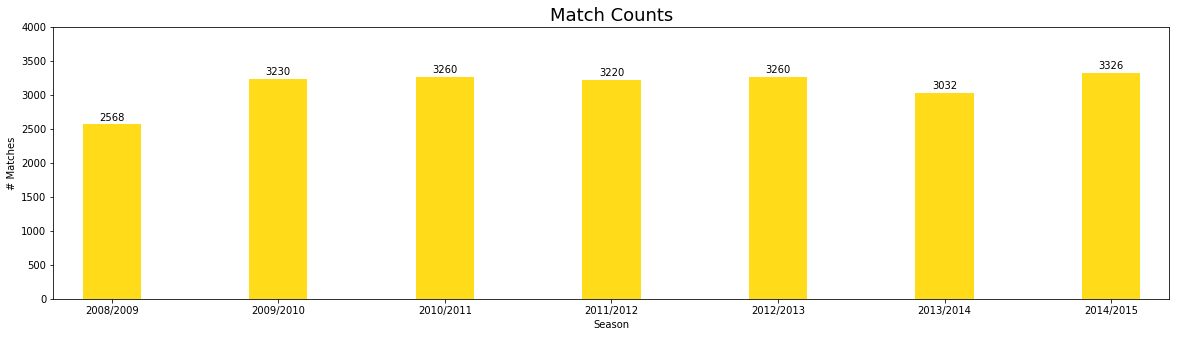

In [53]:
# Create plot
fig, ax = plt.subplots()
index = np.arange(len(match_counts))
objects = df['season'].unique()

# Plot axis
plt.axis((-0.35,6+0.35,0,4000))

bar_width = 0.35
opacity = 0.9

# Bar plot
rects1 = plt.bar(index, df_match_counts[0], bar_width, alpha = opacity, color = 'gold')

# Plot labels and title
plt.xlabel('Season')
plt.ylabel('# Matches')
plt.xticks(index, objects)
plt.title('Match Counts', fontdict={'fontsize':18})

# Graph size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#plt.grid(False)

# Labeling the bars
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height, '%d' % height,
        ha='center', va='bottom')
autolabel(rects1)

#plt.tight_layout()
plt.show()

The season of 2014/2015 has the most matches. Let's check who was the team which has most wins in this season.

## What is the best team of 2014/2015?

The easiest way to select the best teams is looking for the victories of them, let's check it out:

In [48]:
# Selecting only top 10 teams of 2014/2015
df_1415_won = df_1415.groupby(['result','team_long_name']).size()['won'].sort_values(ascending=False).head(10)

# Creating empty lists to receive the data below
df_1415_list_won = []
df_1415_list_lost = []
df_1415_list_draw = []

# Because the grain level of the data is in player level, we need to divide it by 11 
# to transform our analysit into team level
num_players = 11

# Indexing the results to the list, in order to plot it in the next step
for i in df_1415_won.index:
    won = (df_1415.groupby(['team_long_name','result']).size()[i][2])/num_players
    lost = (df_1415.groupby(['team_long_name','result']).size()[i][1])/num_players
    draw = (df_1415.groupby(['team_long_name','result']).size()[i][0])/num_players
    
    df_1415_list_won.append(won)
    df_1415_list_lost.append(lost)
    df_1415_list_draw.append(draw)

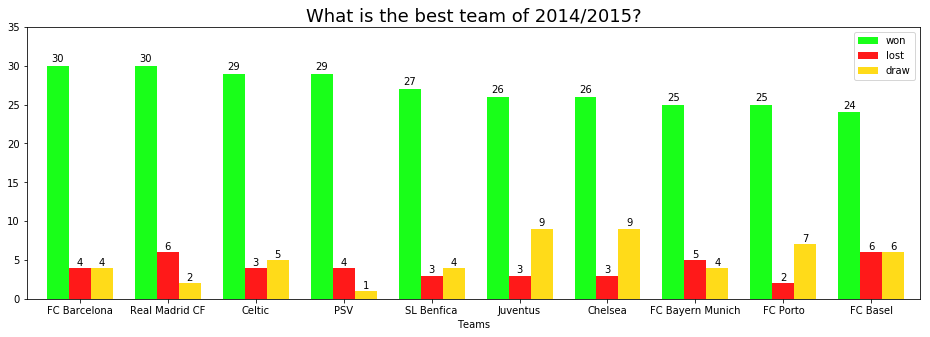

In [49]:
#create plot

fig, ax = plt.subplots()
index = np.arange(df_1415_won.count())
objects = df_1415_won.index

# Plot axis
plt.axis((-bar_width,9.8,0,35))

bar_width = 0.25
opacity = 0.9

# Bar plot
rects1 = plt.bar(index, df_1415_list_won, bar_width, alpha = opacity, color = 'lime', label = 'won')
rects2 = plt.bar(index+bar_width, df_1415_list_lost, bar_width, alpha = opacity, color = 'red',label = 'lost')
rects3 = plt.bar(index+bar_width*2, df_1415_list_draw, bar_width, alpha = opacity, color = 'gold',label = 'draw')

# Plot labels and title
plt.xlabel('Teams')
plt.ylabel('')
plt.xticks(index+bar_width, objects)
plt.title('What is the best team of 2014/2015?', fontdict={'fontsize':18})
plt.legend()

# Graph size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#plt.grid(False)

# Labeling the bars
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height, '%d' % height,
        ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#plt.tight_layout()
plt.show()

Barcelona won the most in 2014/2015 and we can also consider that it was the best team in 2014/2015!

## Who scores the most goals, wins the championship?

Every team aims for the victory of the championship, but is correct to affirm that there's a direct relationship between a winner team and a scorer team?

In [50]:
# Creating a list with country short names
country_names = ['bel','eng','fra','ger','ita','ned','pol','por','sco','esp','swi']

# Creating a Dataframe to each country
df_1415_bel_goals = pd.DataFrame()
df_1415_eng_goals = pd.DataFrame()
df_1415_fra_goals = pd.DataFrame()
df_1415_ger_goals = pd.DataFrame()
df_1415_ita_goals = pd.DataFrame()
df_1415_ned_goals = pd.DataFrame()
df_1415_pol_goals = pd.DataFrame()
df_1415_por_goals = pd.DataFrame()
df_1415_sco_goals = pd.DataFrame()
df_1415_esp_goals = pd.DataFrame()
df_1415_swi_goals = pd.DataFrame()

# Indexing the top 3 teams of each country on each dataframe
df_1415_bel_goals['Belgium'] =      (df_1415_bel.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_eng_goals['England'] =      (df_1415_eng.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_fra_goals['France'] =       (df_1415_fra.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_ger_goals['Germany'] =      (df_1415_ger.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_ita_goals['Italy'] =        (df_1415_ita.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_ned_goals['Netherlands'] =  (df_1415_ned.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_pol_goals['Poland'] =       (df_1415_pol.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_por_goals['Portugal'] =     (df_1415_por.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_sco_goals['Scotland'] =     (df_1415_sco.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_esp_goals['Spain'] =        (df_1415_esp.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players
df_1415_swi_goals['Switzerland'] =  (df_1415_swi.groupby(['country','league','team_long_name']).sum() \
                                    .sort_values(by='points',ascending=False).head(3)['team_goals'])/num_players


# Concatenating all df into one
df_1415_goals = pd.concat([df_1415_bel_goals, df_1415_eng_goals, df_1415_fra_goals, df_1415_ger_goals,
                           df_1415_ita_goals, df_1415_ned_goals, df_1415_pol_goals, df_1415_por_goals,
                           df_1415_sco_goals, df_1415_esp_goals, df_1415_swi_goals], sort=False)

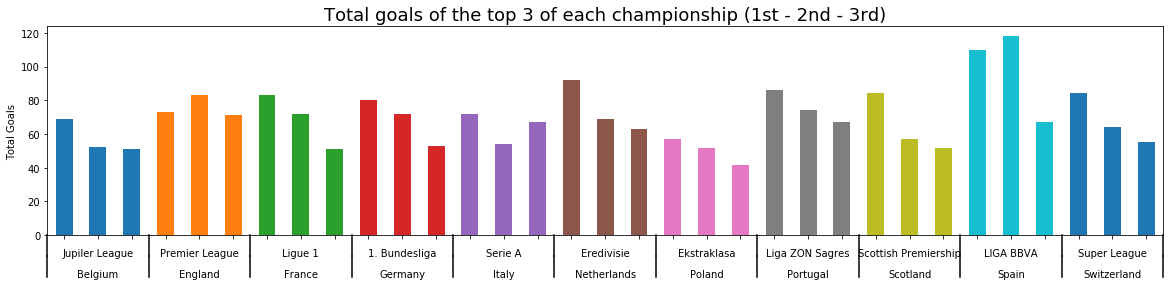

In [51]:
# Creating the division lines
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

# Getting the labels lenght
def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

# Groupping data to each bar column
def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[1::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

# Bar plot
fig = plt.figure()
ax = fig.add_subplot(111)
df_1415_goals.plot(kind='bar',stacked=True,ax=fig.gca())

# Labeling
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df_1415_goals)
#plt.xlabel('League')
plt.ylabel('Total Goals')
#plt.xticks(x, objects_2)
plt.title('Total goals of the top 3 of each championship (1st - 2nd - 3rd)', fontdict={'fontsize':18})

fig.subplots_adjust(bottom=.1*df_1415_goals.index.nlevels)
#plt.legend()
ax.get_legend().remove()

# Graph size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.show()

Looking to the above graph we can see that there's a strong relationship between the first place of the championship and the team which scores more, 9 in 11 leagues the first place was the scorer team.

So if I had a team for sure I would aim my team to be offensive, in order to win the championship!

But this graph doesn't show what's the most important sector to invest the money (attackers, midfield, side players, etc), we need further analysis to check it.

## Which league did most goals in 2014/2015?

We could see that is important to have an offensive team to win the championship, but some leagues is easier to score than others.
Which league did most goals in 2014/2015?

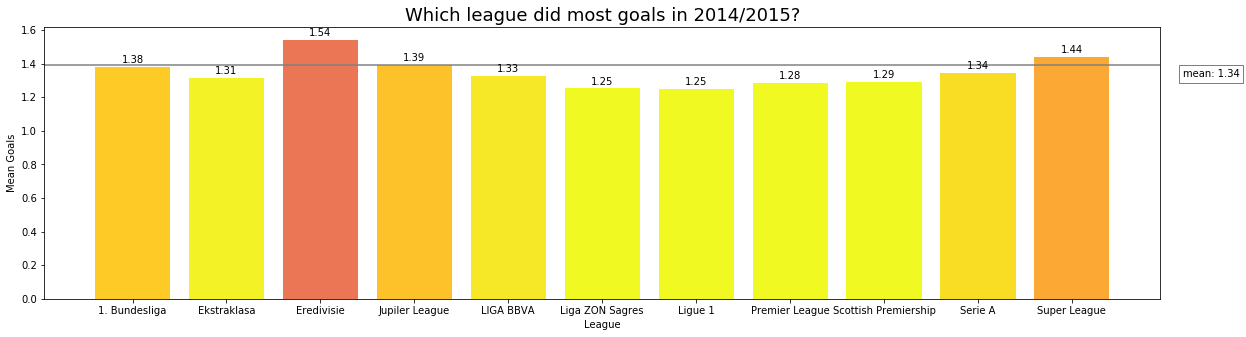

In [52]:
# Selecting the mean of goals of all the leagues
goals_mean_list = df_1415.groupby(['league']).describe()['team_goals']['mean']
goals_mean_goals = df_1415.describe()['team_goals'][1]
objects = df_1415['league'].sort_values().unique()

# Bar plot
fig, ax = plt.subplots()
x = np.arange(len(goals_mean_list))
y = np.array(goals_mean_list)
norm = matplotlib.colors.Normalize(1.3, 2)
rects1 = ax.bar(x,y, color=plt.cm.plasma_r(norm(y)))
ax.axhline(1.39, color="gray")
ax.text(1.02, goals_mean_goals, 'mean: {:,.2f}'.format(goals_mean_goals), va='center', ha="left", 
        bbox=dict(facecolor="w",alpha=0.5), transform=ax.get_yaxis_transform())

# Labels and title
plt.xlabel('League')
plt.ylabel('Mean Goals')
plt.xticks(x, objects)
plt.title('Which league did most goals in 2014/2015?', fontdict={'fontsize':18})
#plt.legend()

# Graph size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

# Labeling bars
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height, '%.2f' % float(height),
        ha='center', va='bottom')
        
autolabel(rects1)

plt.show()

Looking at the above graph and for the last graph we could conclude some things:

- As the top 2 teams of Spanish league has the total goals very bigger than others leagues and this league has one of the lowest means of goals of all, we can conclude that this league is the most unbalanced of all.

- Eredivisie league has an astonishing mean of 1.54 goals per game and the top 3 scored one of the highest points of all leagues, categorizing this league as the most offensive of all!

- It's not a coincidence that PSV appears as the 4th best team of all, this team has a extremally offensive schema and probably has the most valuable players of the championship, with investments not only to win the national championship (which was not a big effort, looking at the huge gap between the first and the second places) but to won other euro leagues, as Champions League and FIFA Club Cup.

<a id='conclusions'></a>
## Conclusions

In this project we analyzed:

- What was the best team of 2014/2015;
- If who scores the most goals wins the championship;
- Which league did most goals in 2014/2015;

We could see that there is a relationship between the total goals of a team and their position in the championship, we can't categorize this relationship (strong, medium or low) or even measure it (descriptive variable) because we didn't do a more detailed analysis of this question.

We can also visualize that the "best teams" of 2014/2015 (Barcelona and Real Madrid) were also in the most unbalanced leagues of all, raising a question whether these teams were really good or they were just in a limited league. This question can be put to the test grouping all the best teams into a major European league and see how well these teams would perform, for example, in the Champions League.

In overview, this project analysis was generalist and wasn't my intention to seek details of every question. This deeper analysis could be done in another project and the main topics that could be covered are:

- Seek for prediction of the results of other games with these variables and (if possible) measure and analysis the reliability of this/these model(s);